In [1]:
from sklearnex import patch_sklearn
patch_sklearn()
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/wave2/qbo_data.csv",index_col="run_id")
df = df.sort_values("qbo_period_std")
df

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


,Bt,cw,qbo_periods,qbo_period_std,qbo_period_fft,qbo_count,qbo_rmse_ampltiude,qbo_amplitude_mean,qbo_amplitude_std
run_id,,,,,,,,,
29,0.003122,28.390768,24.995208,1.571812,24.000000,8.0,23.264466,26.079263,2.346655
1,0.002943,55.594751,30.758330,1.577248,30.000000,6.0,32.540443,29.055506,2.102687
23,0.004193,22.004849,23.084973,1.595634,21.818182,10.0,23.518168,27.463631,1.681063
18,0.003103,41.787018,30.565264,1.723404,30.000000,7.0,32.261969,28.480462,1.892546
37,0.003191,31.865844,26.507719,1.924225,26.666667,8.0,27.627196,27.786190,1.374988
47,0.003522,29.996053,25.582210,1.946630,26.666667,9.0,28.441248,29.136836,1.634658
20,0.002596,47.312208,29.021905,2.061676,30.000000,7.0,28.331744,26.510592,1.811698
34,0.003264,37.741728,28.663649,2.086518,30.000000,8.0,30.541654,28.170370,1.586159
48,0.003478,30.638360,26.187825,2.134694,26.666667,8.0,29.703835,29.872736,1.831078


In [8]:
OBS_PERIOD_MEAN = 27.915249015787193
OBS_PERIOD_STD = 4.538404428603899

OBS_AMP_MEAN = 26.587500000000002
OBS_AMP_STD =2.953799762291663

CURRENT_CW = 35
CURRENT_BT = 0.0043

In [21]:
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
X = df[["Bt","cw"]].to_numpy()
y_point_error = df[["qbo_period_std","qbo_amplitude_std"]].to_numpy()
y = df[["qbo_periods","qbo_amplitude_mean"]].to_numpy()

mean_y = np.mean(y,axis=0)
std_y = np.std(y,axis=0)
y_norm = (y - mean_y)/std_y
y_point_error = y_point_error/std_y


scaler = StandardScaler()
pca = PCA()
X_scaled = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

gpr_period = GaussianProcessRegressor(alpha=(y_point_error[:,0])**2)
gpr_amplitude = GaussianProcessRegressor(alpha=(y_point_error[:,1])**2)
gpr_period.fit(X_pca,y_norm[:,0])
gpr_amplitude.fit(X_pca,y_norm[:,1])



GaussianProcessRegressor(alpha=array([1.06870395, 0.85804205, 0.5484374 , 0.69510722, 0.36690755,
       0.51857643, 0.6369872 , 0.48826132, 0.65068813, 1.33651242,
       0.35690148, 0.6591062 , 1.1788892 , 0.46560198, 0.85316461,
       4.25138436, 0.1634493 , 0.61469908, 0.90030834, 2.02540695,
       0.6992849 , 0.73038869, 0.79019597, 0.38347396, 0.46662659,
       0.99778669, 0.88599898, 0.92307386, 1.01392798, 1.21901398,
       2.14789522, 0.57537286, 0.44994085, 0.73553952, 0.65552702,
       0.88781088, 1.22388753, 0.6927005 , 0.94250515, 0.88581729,
       0.81880891, 1.10626807, 1.09315984, 0.64339779, 0.71916582,
       1.60833786, 2.10410833]))

In [22]:
CW_POINTS = 1000
BT_POINTS = 1000
min_bt,min_cw = 0.001,5
max_bt,max_cw = 0.007,70
cw = np.linspace(min_cw,max_cw,CW_POINTS)
Bt = np.linspace(min_bt,max_bt,BT_POINTS)
X_Bt,Y_cw = np.meshgrid(Bt,cw)
x_samples = np.vstack((X_Bt.ravel(),Y_cw.ravel())).T
x_samples = scaler.transform(x_samples)
x_samples = pca.transform(x_samples)

period,period_std = gpr_period.predict(x_samples,return_std=True)
period = period*std_y[0] + mean_y[0]
period = period.reshape((CW_POINTS,BT_POINTS))
period_std = (period_std*std_y[0]).reshape((CW_POINTS,BT_POINTS))


amplitude,amplitude_std = gpr_amplitude.predict(x_samples,return_std=True)
amplitude = amplitude*std_y[1] + mean_y[1]
amplitude = amplitude.reshape((CW_POINTS,BT_POINTS))
amplitude_std = (amplitude_std*std_y[1]).reshape((CW_POINTS,BT_POINTS))

implausability_period = np.abs(period - OBS_PERIOD_MEAN)/np.sqrt(OBS_PERIOD_STD**2 + period_std**2)
implausability_amplitude = np.abs(amplitude - OBS_AMP_MEAN)/np.sqrt(OBS_AMP_STD**2 + amplitude_std**2)
implausability = np.sqrt(implausability_amplitude**2 + implausability_period**2)
imp_cutoff = implausability < np.percentile(implausability,10)

In [23]:
import xarray 
ds = xarray.load_dataset("wave1_predictions.nc")
wave_1 = ds.imp_cutoff.to_numpy()
imp_cutoff = wave_1 & imp_cutoff

In [67]:
np.mean(period_std)

2.5817506663636194

In [68]:
np.mean(amplitude_std)

1.7951710985972378

In [36]:
np.percentile(implausability,1)

0.1350009048876843

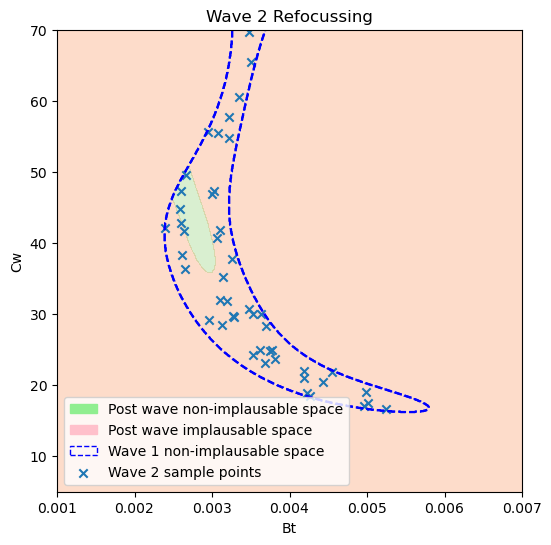

In [55]:
import matplotlib.patches as mpatches

fig,(ax3) = plt.subplots(1,1,figsize=(6,6))
# ax1.contourf(X_Bt,Y_cw,amp_region,levels=3,colors=['#ffffff00','#000000ff'],hatches=[None,'x'],alpha=0.1)
# CS = ax1.contour(X_Bt,Y_cw,amplitude,levels=25)

# ax1.scatter(X[:,0],X[:,1],marker='x')
# ax1.clabel(CS, CS.levels, inline=True,  fontsize=10)
# ax1.set_ylabel("Cw")
# ax1.set_xlabel("Bt")
# ax1.set_title("QBO Amplitude (m/s)")

# #ax2.contourf(X_Bt,Y_cw,period_region,levels=3,colors=['#ffffff00','#000000ff'],hatches=[None,'x'],alpha=0.1)
# CS2 = ax2.contour(X_Bt,Y_cw,period,levels=25)
# ax2.scatter(X[:,0],X[:,1],marker='x')
# ax2.clabel(CS2, CS2.levels, inline=True,  fontsize=10)
# ax2.set_ylabel("Cw")
# ax2.set_xlabel("Bt")
# ax2.set_title("QBO Period (months)")

#ax3.contour(X_Bt,Y_cw,implausability,levels=[0.1,0.2,0.25,0.3,0.5])
CS3 = ax3.contourf(X_Bt,Y_cw,imp_cutoff,alpha=0.3,cmap='RdYlGn',levels=1)
ax3.contour(X_Bt,Y_cw,wave_1,linestyles=['--'],levels=1,colors=['blue'])
scatter = ax3.scatter(X[:,0],X[:,1],marker='x',label="Wave 2 sample points")
ax3.set_ylabel("Cw")
ax3.set_xlabel("Bt")
ax3.legend(handles=[mpatches.Patch(color='lightgreen',label="Post wave non-implausable space"),
                    mpatches.Patch(color='pink',label="Post wave implausable space"),
                    mpatches.Patch(fill=False,edgecolor='blue',linestyle='--',label="Wave 1 non-implausable space"),scatter])
ax3.set_title("Wave 2 Refocusing")

fig.savefig("wave2.png")

In [58]:
100*np.sum(wave_1)/(imp_cutoff.shape[0]*imp_cutoff.shape[1])# reduction after first wave

0.1

In [60]:
100*np.sum(imp_cutoff)/(imp_cutoff.shape[0]*imp_cutoff.shape[1])

0.9972